In [1]:
from qiskit import * #qiskit
from qiskit.visualization import plot_histogram #for plotting histogram
import numpy as np # for mathematical computation
import matplotlib.pyplot as plt #for plotting graph
#%matplotlib inline

from qiskit_aer import AerSimulator  # change this to Aer for C++ compiled code and the option to run on the GPU. Or use BasicAer for python providers
#from qiskit.algorithms import VQE

In [2]:
#from qiskit.opflow import MatrixOp
from qiskit.quantum_info import Operator, SparsePauliOp
from qiskit.circuit.library import EfficientSU2

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
from cmath import e
from cmath import pi
import cmath
import sympy as sym
from tqdm import tqdm

from scipy import sparse
from scipy.sparse import csr_matrix

from scipy.linalg import expm, logm

from scipy.linalg import eig, eigh
from scipy.sparse.linalg import eigs, eigsh

from scipy.optimize import minimize, Bounds

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import quspin
import pandas as pd
from tqdm import tqdm
from scipy.integrate import quad
from scipy.optimize import curve_fit
import csv
import scipy.stats
from scipy.linalg import logm, expm

from quspin.operators import hamiltonian,exp_op
from quspin.basis import spinful_fermion_basis_general
from quspin.basis import spin_basis_1d
from quspin.basis import spinless_fermion_basis_1d
from quspin.basis import tensor_basis
from quspin.tools.measurements import ent_entropy

from matplotlib import rc


from quspin.tools.evolution import evolve
from quspin.tools.Floquet import Floquet_t_vec 
from six import iteritems 

import time

In [5]:
import qiskit
qiskit.__version__

'1.3.2'

# Hamiltonian

In [7]:
from scipy.sparse import identity
import scipy.sparse as sp
from scipy.linalg import expm, sqrtm, eigh, eigvalsh
from scipy.sparse.linalg import eigsh

def H_spin(m, a,g,L):
    hop_term=[[0.25/a, j, j+1] for j in range(L-1)]

    
    hop_mass=[[0.5*m*(-1)**(j+1), j] for j in range(L)]
    
    hop_zz_g=[[0.25*g/a, j, j+1] for j in range(L-1)]
    hop_z1_g=[[0.25*g/a, j] for j in range(L-1)]
    hop_z2_g=[[0.25*g/a, j+1] for j in range(L-1)]
    ID=[[0.25*(g/a),n] for n in range(L)]
        
    basis = spin_basis_1d(L)

    # Define Hamiltonian
    static = [["xx",hop_term],["yy",hop_term], ["z", hop_mass], ["zz",hop_zz_g],["z",hop_z1_g],["z",hop_z2_g], ["I",ID]]
    dynamic = []
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex128,
                    check_symm=False,check_herm=False,check_pcon=False)
    
    # Find ground state and its energy
    return H#+((g/a)*0.25*(L-1))*identity(2**L)

In [12]:
N = 4

a = 0.5
m = 1.0
g = 1.0

In [18]:
Ham = H_spin(m, a, g, N)

In [20]:
Ham

<quspin.operators.hamiltonian:
static mat: <Compressed Sparse Row sparse matrix of dtype 'complex128'
	with 40 stored elements and shape (16, 16)>
dynamic:>

In [22]:
E,V=Ham.eigsh(k=5,which="SA")

In [24]:
E

array([-2.34152542, -1.40211303, -0.6755705 ,  0.33600419,  0.5       ])

In [27]:
qubitHam = Operator(Ham.toarray())

In [29]:
Ham_qiskit = SparsePauliOp.from_operator(qubitHam, atol=None, rtol=None)

In [31]:
Ham_qiskit

SparsePauliOp(['IIII', 'IIIZ', 'IIXX', 'IIYY', 'IIZI', 'IIZZ', 'IXXI', 'IYYI', 'IZII', 'IZZI', 'XXII', 'YYII', 'ZZII'],
              coeffs=[2. +0.j, 1. +0.j, 0.5+0.j, 0.5-0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5-0.j,
 1.5+0.j, 0.5+0.j, 0.5+0.j, 0.5-0.j, 0.5+0.j])

In [36]:
ansatz = EfficientSU2(N, su2_gates=['ry'], entanglement="pairwise", reps=6)
#ansatz = EfficientSU2(N, su2_gates=['ry'], entanglement="linear", reps=4)
#ansatz = EfficientSU2(N, su2_gates=['ry'], entanglement="full", reps=4)

#ansatz = EfficientSU2(N, su2_gates=['ry'], entanglement="pairwise", reps=4)

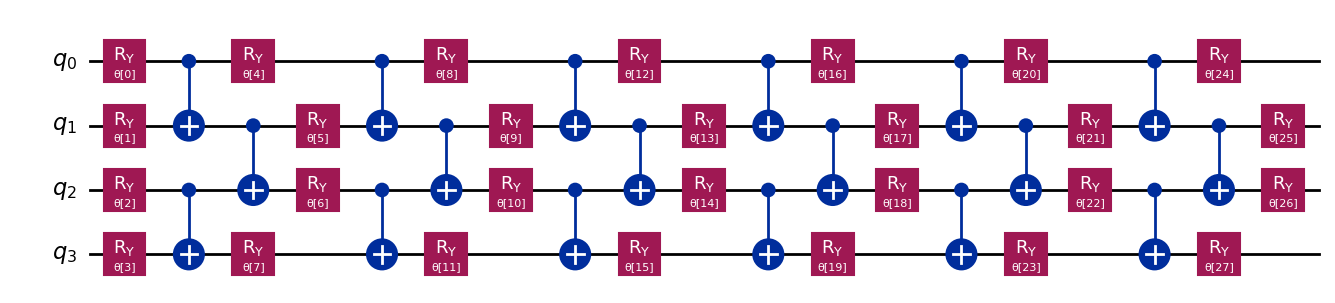

In [38]:
ansatz.decompose().draw('mpl', fold=30)

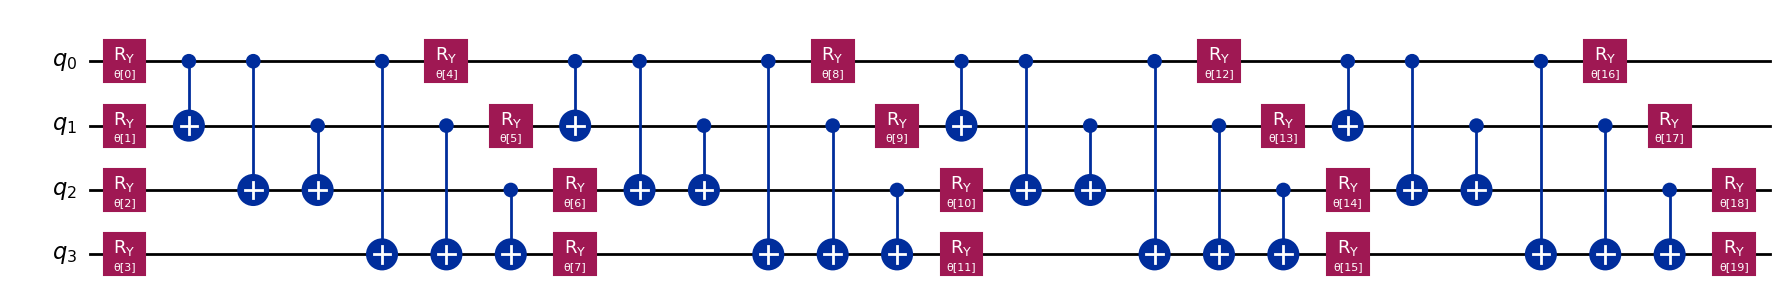

In [463]:
ansatz.decompose().draw('mpl', fold=30)

In [40]:
type(ansatz)

qiskit.circuit.library.n_local.efficient_su2.EfficientSU2

In [42]:
dir(ansatz)

['__abstractmethods__',
 '__and__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_abc_impl',
 '_add_qreg',
 '_allow_fast_path_parametrization',
 '_ancillas',
 '_append',
 '_append_standard_gate',
 '_appended_blocks',
 '_appended_entanglement',
 '_base_name',
 '_bounds',
 '_build',
 '_build_additional_layers',
 '_build_entanglement_layer',
 '_build_rotation_layer',
 '_builder_api',
 '_calibrations',
 '_calibrations_prop',
 '_cast',
 '_cbit_argument_conversion',
 '_check_configuration',
 '_check_dups',
 '_clbit_indices',
 '_cls_instances

In [44]:
ansatz.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11]), ParameterVectorElement(θ[12]), ParameterVectorElement(θ[13]), ParameterVectorElement(θ[14]), ParameterVectorElement(θ[15]), ParameterVectorElement(θ[16]), ParameterVectorElement(θ[17]), ParameterVectorElement(θ[18]), ParameterVectorElement(θ[19]), ParameterVectorElement(θ[20]), ParameterVectorElement(θ[21]), ParameterVectorElement(θ[22]), ParameterVectorElement(θ[23]), ParameterVectorElement(θ[24]), ParameterVectorElement(θ[25]), ParameterVectorElement(θ[26]), ParameterVectorElement(θ[27])])

In [46]:
from qiskit.circuit import ParameterVector, QuantumCircuit

In [68]:
# define your parameters
p = ParameterVector('p', 3)  

circuit = QuantumCircuit(2)
circuit.rx(p[0], 0)  # RX(p[0]) on qubit 0
circuit.ry(p[1], 0)  # RY(p[1]) on qubit 1
circuit.crz(p[2], 0, 1)  # CRZ(p[2]) controlled on qubit 0, acting on qubit 1

# bind the values
bound_circuit = circuit.assign_parameters({p: [0, 1, 2]})

# or for a list of values
#values = [ [0, 1, 2], [1, 2, 3], [2, 3, 4] ]
#bounds_circuits = [circuit.assign_parameters({p: val for val in values})]

In [66]:
circuit.parameters

ParameterView([ParameterVectorElement(p[0]), ParameterVectorElement(p[1]), ParameterVectorElement(p[2])])

In [436]:
x0 = [np.pi/2] * ansatz.num_parameters

In [439]:
x0

[1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966]

In [47]:
len(x0)

28

# Estimator V1

In [100]:
from qiskit.primitives import Estimator # Estimator V1
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit import Aer, BasicAer, assemble
#from qiskit_ibm_runtime import Estimator

In [103]:
backend = AerSimulator()
estimator_v1 = Estimator()

C:\Users\yukwa\AppData\Local\Temp\ipykernel_19064\3976521138.py:2: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator_v1 = Estimator()


In [105]:
estimator_v1

In [107]:
def costFunctionE1(param, ansatz, Ham, params, expectations):

    
    
    params.append(param)
    
    start = time.time()
    job = estimator_v1.run([ansatz], [Ham], [param])
    result = job.result()
    exp = result.values[0]
    #print('run() time: ', time.time() - start)
    
        

    expectations.append(exp)
    
    
    return exp

In [109]:
params = []
expectations = []
maxiter = 1000

start_time = time.time()
result = minimize(costFunctionE1, x0, (ansatz, Ham_qiskit, params, expectations), method='COBYLA', options={'maxiter': maxiter}) # Success [2.71211263, 1.5909917 ]

print("--- minimize() running time: %s seconds ---\n" % (time.time() - start_time))
theta = result.x
print(result)
print(theta)
print(result.fun)

--- minimize() running time: 5.285329103469849 seconds ---

 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: -2.341524683467629
       x: [ 1.442e+00  2.748e+00 ...  1.570e+00  1.608e+00]
    nfev: 1000
   maxcv: 0.0
[1.44243044 2.74788156 3.73316767 2.89252605 1.64980639 1.70959453
 2.42097159 1.16557253 2.09381082 2.79662384 1.457571   1.16044081
 1.56842396 1.57500946 1.95102644 1.31701695 1.14630675 1.63561103
 1.71953459 1.37127272 1.25463629 1.35487233 1.53151696 1.28183637
 1.42368574 2.62411017 1.57038164 1.60843304]
-2.341524683467629


In [110]:
E

array([-2.34152542, -1.40211303, -0.6755705 ,  0.33600419,  0.5       ])

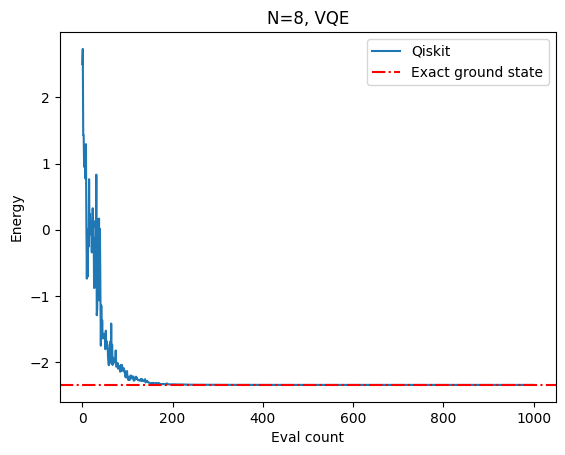

In [114]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

# Estimator V2

In [107]:
#from qiskit.primitives import Estimator # Estimator V1
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit_aer import AerSimulator
#from qiskit_aer.primitives import SamplerV2 as Sampler_aer
#from qiskit_aer.primitives import EstimatorV2 as Estimator_aer
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


In [169]:
backend = AerSimulator()
estimator_v2 = Estimator(backend)
estimator_v2.options.default_shots = 50000

In [172]:
estimator_v2

In [174]:
def costFunctionE2(param, ansatz, Ham, params, expectations):

    #estimator = Estimator()
    
    params.append(param)
    
    start = time.time()

    pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
    isa_circuit = pm.run(ansatz)
    isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)
    job = estimator_v2.run([(ansatz, Ham, param)])

    #job = estimator.run([(ansatz, Ham, param)])
    result = job.result()
    #print(result)
    exp = float(result[0].data.evs)
    
    #print('run() time: ', time.time() - start)
    
        

    expectations.append(exp)
    
    
    return exp

In [178]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ansatz)
isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)
costFunctionE2(x0, isa_circuit, isa_observable, [], [])

2.48284

In [176]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ansatz)
isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)
costFunctionE2(theta, isa_circuit, isa_observable, [], [])

-2.3425599999999998

In [148]:
x0 = [np.pi/2] * ansatz.num_parameters

In [180]:
x0 = theta

In [182]:
x0

array([1.44243044, 2.74788156, 3.73316767, 2.89252605, 1.64980639,
       1.70959453, 2.42097159, 1.16557253, 2.09381082, 2.79662384,
       1.457571  , 1.16044081, 1.56842396, 1.57500946, 1.95102644,
       1.31701695, 1.14630675, 1.63561103, 1.71953459, 1.37127272,
       1.25463629, 1.35487233, 1.53151696, 1.28183637, 1.42368574,
       2.62411017, 1.57038164, 1.60843304])

In [184]:
params = []
expectations = []
maxiter = 1000

start_time = time.time()

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(ansatz)
isa_observable = Ham_qiskit.apply_layout(isa_circuit.layout)

result = minimize(costFunctionE2, x0, (isa_circuit, isa_observable, params, expectations), method='COBYLA', options={'maxiter': maxiter}, tol=1e-20) # Success [2.71211263, 1.5909917 ]
#, tol=1e-3

print("--- minimize() running time: %s seconds ---\n" % (time.time() - start_time))
theta = result.x
print(result)
print(theta)
print(result.fun)

--- minimize() running time: 321.63297390937805 seconds ---

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -2.3317599999999996
       x: [ 1.477e+00  2.746e+00 ...  1.572e+00  1.608e+00]
    nfev: 882
   maxcv: 0.0
[1.47654866 2.74585235 3.73491127 2.86575319 1.65744511 1.70484145
 2.40840292 1.17224344 2.09247186 2.79658282 1.45737774 1.16207787
 1.57168486 1.57338792 1.95170289 1.31652341 1.14577741 1.6380787
 1.71660631 1.3703716  1.25478825 1.35552211 1.53462408 1.27969574
 1.42283605 2.62396181 1.57169161 1.60774963]
-2.3317599999999996


In [185]:
E

array([-2.34152542, -1.40211303, -0.6755705 ,  0.33600419,  0.5       ])

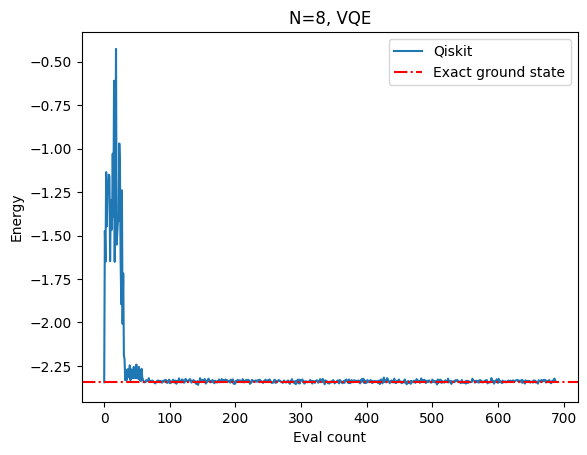

In [187]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

#pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

#pylab.plot(range(maxiter),expectations[:maxiter], label=f"Qiskit VQE state")
pylab.plot(range(len(expectations)),expectations, label=f"Qiskit")
plt.axhline(y=E[0], color='r', linestyle='-.', label=f"Exact ground state")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
#pylab.title("Energy convergence for each computed state")
plt.title('N=8, VQE')
pylab.legend(loc="upper right")

In [136]:
print(time.ctime())

Sat Feb  1 22:41:02 2025


# VQD

In [339]:
def makeAnsatzFull(N, L, param): 
    
    qr = QuantumRegister(N, 'q')
    qc = QuantumCircuit(qr)  
    

    
    for i in range(L):
        for k in range(N):
            qc.ry(param[k+N*i], qr[k])
        
        for j in range(N-1):
            for k in range(j+1,N):
                qc.cx(qr[j], qr[k])

                
    for k in range(N):
        qc.ry(param[k+N*L], qr[k])
    
    
    return qc

In [341]:
def makeAnsatzLinear(N, L, param): 
    
    qr = QuantumRegister(N, 'q')
    qc = QuantumCircuit(qr)  
    

    
    for i in range(L):
        for k in range(N):
            qc.ry(param[k+N*i], qr[k])
        
        for j in range(N-1):
            qc.cx(qr[j], qr[j+1])

                
    for k in range(N):
        qc.ry(param[k+N*L], qr[k])
    
    
    return qc

In [345]:
simulator = AerSimulator(method='statevector')

In [347]:
L = 4
#simulator = BasicAer.get_backend("statevector_simulator")

def costFunctionVQD(param, ansatz, Ham, k, betas, statevectors, params, expectations):

    
    estimator = Estimator()
    

    #service = QiskitRuntimeService()

    
    params.append(param)
    
    
    #job = estimator.run(ansatz, Ham, param)
    job = estimator_v1.run([ansatz], [Ham], [param])
    result = job.result()
    exp = result.values[0]
    
    ansatz_time = 0.0
    execute_time = 0.0
    dot_time = 0.0
    
    
    start = time.time()
    qc = makeAnsatzFull(N, L, param)
    qc.save_statevector()
    #print('makeAnsatz() time: ', time.time() - start)
    ansatz_time += time.time() - start

    start = time.time()
    #job = execute(qc, backend = simulator)
    job = simulator.run(qc)
    result = job.result()
    psi = result.get_statevector(qc)
    #print('execute() time: ', time.time() - start)
    execute_time += time.time() - start
    
    
    for i in range(k):

        start = time.time()
        z = np.dot(np.conjugate(np.transpose(psi)), statevectors[i])
        norm_sq = np.conjugate(z) * z
        exp += betas[i] * norm_sq
        #print('inner prodction time: ', time.time() - start)
        dot_time += time.time() - start
        

    #print('ansatz_time: ', ansatz_time)
    #print('execute_time: ', execute_time)
    #print('dot_time: ', dot_time)
        
        
    expectations.append(exp)
    
    
    return exp

In [350]:
betas

[33, 33]

In [352]:
estimator_v1

In [359]:
k = 2
N = 4
L = 4

In [361]:
import warnings
warnings.filterwarnings('ignore')

In [443]:

params_list = []
expectations_list = []
final_exp = []
final_param = []
psi_list = []
maxiter = 5000

betas =[]

bound = Bounds(lb = -2 * np.pi, ub = 2 * np.pi)

total_time = time.time()

for i in range(k+1):
    params_list.append([])
    expectations_list.append([])

start_time = time.time()
result = minimize(costFunctionE1, x0, (ansatz, Ham_qiskit, params_list[0], expectations_list[0]), method='COBYLA', options={'maxiter': maxiter}, bounds=bound) 
print("--- Ground State computing time: %s seconds ---\n" % (time.time() - start_time))
final_param.append(result.x)
final_exp.append(result.fun)



for i in range(k):

    betas.append(33)
    
    qc = makeAnsatzFull(N, L, final_param[i])
    qc.save_statevector()
    #job = execute(qc, backend = simulator)
    job = simulator.run(qc)
    result = job.result()
    psi_list.append(result.get_statevector(qc))
    

    start_time = time.time()
    result = minimize(costFunctionVQD, x0, (ansatz, Ham_qiskit, i+1, betas, psi_list, params_list[i+1], expectations_list[i+1]), method='SLSQP', options={'maxiter': maxiter}, bounds=bound)
    print(f"--- {i+1}-th Excited State  time: %s seconds ---\n" % (time.time() - start_time))

    final_param.append(result.x)
    final_exp.append(result.fun)


print('\nTotal running time: ', time.time() - total_time)



--- Ground State computing time: 25.50986337661743 seconds ---

--- 1-th Excited State  time: 7.043506145477295 seconds ---

--- 2-th Excited State  time: 6.756081819534302 seconds ---


Total running time:  39.31745648384094


In [444]:
expectations_list[0][-1]

-2.340597625425363

In [445]:
expectations_list[1][-1]

(-1.4021139616331262+0j)

In [446]:
expectations_list[2][-1]

(-0.6755637511719887+0j)

In [409]:
E

array([-2.34152542, -1.40211303, -0.6755705 ,  0.33600419,  0.5       ])

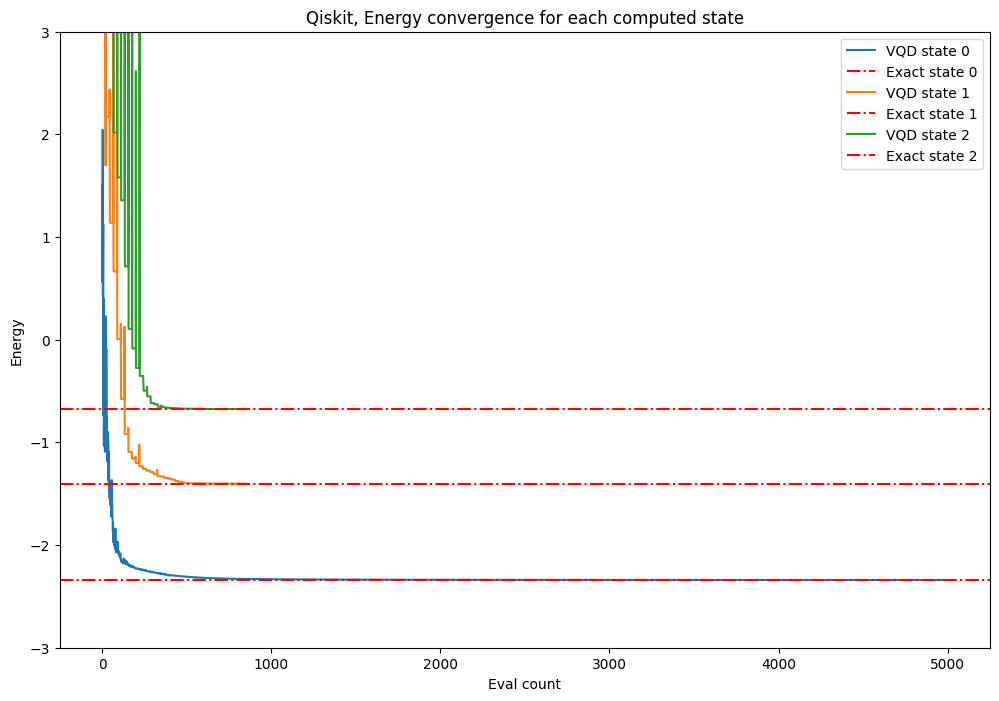

In [451]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

pylab.rcParams["figure.figsize"] = (12, 8)

#steps_np = np.asarray(steps)
#counts_np = np.asarray(counts)
#values_np = np.asarray(values)

for i in range(1,k+2):
    #_counts = counts_np[np.where(steps_np == i)]
    #_values = values_np[np.where(steps_np == i)]
    pylab.plot(range(len(expectations_list[i-1])),expectations_list[i-1][:maxiter], label=f"VQD state {i-1}")
    plt.axhline(y=E[i-1], color='r', linestyle='-.', label=f"Exact state {i-1}")
    #plt.axhline(y=charge_less_E[i-1], color='b', linestyle='--', label=f"Charge Zero Exact state {i-1}")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
plt.ylim((-3,3))
pylab.title("Qiskit, Energy convergence for each computed state")
pylab.legend(loc="upper right")

#plt.savefig("VQD_Chargeless.pdf")

In [327]:
maxiter

5000

In [331]:
len(expectations_list[0])

1154